Давайте познакомимся с одним из способов выделения трендовой и сезонной компонент ряда и визуального анализа шума.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

df = pd.read_csv('../data/AirPassengers.csv') # считываем датасет
df.columns = (['Month','Pass']) # заменяем название столбца '#Passenger' на 'Pass' чтобы избежать путаницы с комментариями
df.head() # смотрим на первые несколько строчек

,Month,Pass
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
# приводим индексы к стандарту pd.Datetime, чтобы потом это можно было скормить seasonal_decompose
df = df.set_index(pd.DatetimeIndex(df['Month'])) 
df.head() # смотрим на результат

,Month,Pass
Month,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [3]:
 # замечаем, что т.к. у нас теперь есть индекс Month, нам больше не нужен столбец Month, который его дублирует
df.drop(['Month'], axis = 1, inplace = True)
df.head() # снова проверяем, что все в порядке. вообще проверять данные на каждом шаге кода - хорошая привычка

,Pass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


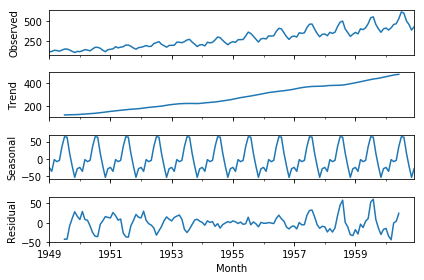

In [4]:
# применяем seasonal_decompose
# эта функция разложит ряд на трендовую, сезонную и шумовую составляющие
decomposition = seasonal_decompose(df, model='additive') 
decomposition.plot()
pyplot.show() # любуемся результатом

In [5]:
trend_part = decomposition.trend # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal # отдельно сезонная составляющаяя
residual_part = decomposition.resid # отдельно шум: то, что осталось

In [6]:
# посмотрим повнимательнее на остатки в начале ряда
residual_part.head()

,Pass
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [7]:
# посмотрим повнимательнее на остатки в конце ряда
residual_part.tail()

,Pass
Month,
1960-08-01,NaN
1960-09-01,NaN
1960-10-01,NaN
1960-11-01,NaN
1960-12-01,NaN


In [8]:
# в конце и в начале стоят значения NaN. Это связано с особенностями алгоритма seasonal_decompose
# если мы хотим далее анализировать остатки, необходимо избавиться от этих некорректных значений
residual_part = residual_part.dropna()
residual_part.head()

,Pass
Month,
1949-07-01,-42.622475
1949-08-01,-42.073232
1949-09-01,-8.478535
1949-10-01,11.059343
1949-11-01,28.593434


Анализ результата:

В ряде явно присутствует тренд на рост и ярко выражена годовая сезонность

Остатки ряда не похожи не хаотичный белый шум и скорее всего все еще содержат закономерности

# Задания

Сделайте декомпозицию на тренд, сезонность и остатки данных из конфетного датасета candy_production.csv.

In [14]:
data = pd.read_csv('../data/candy_production.csv')
data.head(10)

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100
5,1972-06-01,67.6467
6,1972-07-01,69.0429
7,1972-08-01,70.8370
8,1972-09-01,75.0462
9,1972-10-01,106.9289


In [15]:
# заменяем названия столбцов
data.columns = (['date', 'value']) 

# приведем формата даты к стандарту datetime
data.loc[:, 'date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

# приводим индексы к стандарту pd.Datetime, чтобы потом это можно было скормить seasonal_decompose
data = data.set_index(pd.DatetimeIndex(data['date'])) 

# нам больше не нужен столбец date, который его дублирует
data.drop(['date'], axis = 1, inplace = True)
data.head(10)

,value
date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100
1972-06-01,67.6467
1972-07-01,69.0429
1972-08-01,70.8370
1972-09-01,75.0462


**Задание 7.8.1**

1. Сколько элементов содержит исходный датасет?
2. Сколько элементов содержит шумовая часть?
3. Сколько числовых элементов содержит шумовая часть?
4. Сколько элементов содержит сезонная часть?
5. Сколько числовых элементов содержит сезонная часть?
6. Поделитесь картинкой декомпозиции в нашем канале Slack

In [17]:
data.shape[0]

548

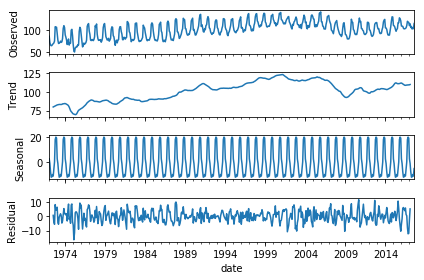

In [18]:
# применяем seasonal_decompose
# эта функция разложит ряд на трендовую, сезонную и шумовую составляющие
decomposition = seasonal_decompose(data, model='additive') 
decomposition.plot()
pyplot.show() # любуемся результатом

In [19]:
trend_part = decomposition.trend # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal # отдельно сезонная составляющаяя
residual_part = decomposition.resid # отдельно шум: то, что осталось

In [22]:
residual_part.shape[0]

548

In [24]:
residual_part.isnull().sum()

value    12
dtype: int64

In [25]:
seasonal_part.shape[0]

548

In [26]:
seasonal_part.isnull().sum()

value    0
dtype: int64